In [1]:
import asyncio
import aiohttp
import requests
import json
import time
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
async def make_request(session, url):
    async with session.get(url) as response:
        return await response.text()

async def sim_calls(num_requests):
    url = "http://10.171.9.221:5000/home"
    results = defaultdict(lambda :0)

    async with aiohttp.ClientSession() as session:
        tasks = [make_request(session, url) for _ in range(num_requests)]
        responses = await asyncio.gather(*tasks)

    for response in responses:
        #print(response)
        server = json.loads(response)["message"].split(":")[-1].strip()
        results[server] += 1

    print("Requests handled by each server instance:")
    return results

In [7]:
num_rep=requests.get("http://10.171.9.221:5000/home").json()["message"]["status"]

TypeError: string indices must be integers

In [12]:

if __name__ == "__main__":
    l={}
    for r in range(4): #0:2 1:3 2:4 3:5 4:6: 7
        num_rep=requests.get("http://10.171.9.221:5000/rep").json()["message"]["N"]
        load = await asyncio.wait_for(sim_calls(10000),timeout=None)
        l[num_rep]=dict(load)
        print(l)

        if r<3:
            status=requests.post("http://10.171.9.221:5000/add",json={'n':1}).status_code
            if status==200:
                print("added")
            else:
                print("can not add")
            time.sleep(10)

Requests handled by each server instance:
{3: {'Server_746730': 5978, 'Server_632389': 2499, 'Server_817449': 1523}}
added
Requests handled by each server instance:
{3: {'Server_746730': 5978, 'Server_632389': 2499, 'Server_817449': 1523}, 4: {'RandomServer791580': 3373, 'Server_632389': 2216, 'Server_746730': 3423, 'Server_817449': 988}}
added
Requests handled by each server instance:
{3: {'Server_746730': 5978, 'Server_632389': 2499, 'Server_817449': 1523}, 4: {'RandomServer791580': 3373, 'Server_632389': 2216, 'Server_746730': 3423, 'Server_817449': 988}, 5: {'Server_632389': 2196, 'RandomServer163961': 1594, 'Server_746730': 2373, 'RandomServer791580': 2844, 'Server_817449': 993}}
added
Requests handled by each server instance:
{3: {'Server_746730': 5978, 'Server_632389': 2499, 'Server_817449': 1523}, 4: {'RandomServer791580': 3373, 'Server_632389': 2216, 'Server_746730': 3423, 'Server_817449': 988}, 5: {'Server_632389': 2196, 'RandomServer163961': 1594, 'Server_746730': 2373, 'Ran

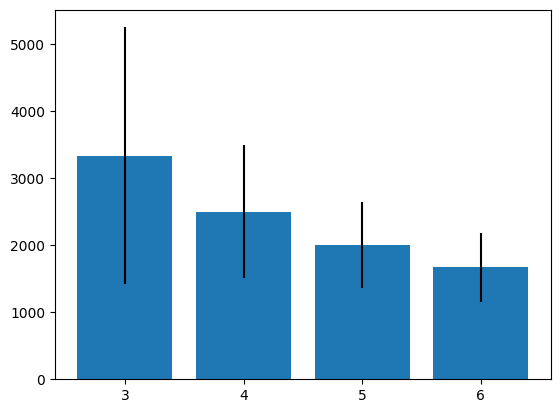

In [14]:
plt.bar(np.arange(4),height=[np.mean(list(d.values()))for d in l.values()],yerr=[np.std(list(d.values()))for d in l.values()])
plt.xticks(np.arange(4),list(l.keys()))
plt.xlabel("no of servers")
plt.ylabel("no. of requests")
plt.title("avg load per server")
plt.savefig("./results/AnalysisServerAddition.jpg")

In [ ]:
requests.get("http://10.171.9.221:5000/rep").json()["message"]

In [15]:

if __name__ == "__main__":
    l={}
    for r in range(4):
        num_rep=requests.get("http://10.171.9.221:5000/rep").json()["message"]["N"]
        load = await asyncio.wait_for(sim_calls(10000),timeout=None)
        l[num_rep]=dict(load)
        print(l)

        if r<3:
            status=requests.delete("http://10.171.9.221:5000/rm",json={'n':1}).status_code
            if status==200:
                print("removed")
            else:
                print("can not remove")
            time.sleep(20)

Requests handled by each server instance:
{6: {'Server_632389': 2052, 'RandomServer163961': 1504, 'Server_817449': 791, 'Server_746730': 2391, 'RandomServer869145': 1361, 'RandomServer791580': 1901}}
removed
Requests handled by each server instance:
{6: {'Server_632389': 2052, 'RandomServer163961': 1504, 'Server_817449': 791, 'Server_746730': 2391, 'RandomServer869145': 1361, 'RandomServer791580': 1901}, 5: {'RandomServer869145': 1644, 'Server_746730': 2647, 'RandomServer791580': 2036, 'RandomServer163961': 1548, 'Server_632389': 2125}}
removed
Requests handled by each server instance:
{6: {'Server_632389': 2052, 'RandomServer163961': 1504, 'Server_817449': 791, 'Server_746730': 2391, 'RandomServer869145': 1361, 'RandomServer791580': 1901}, 5: {'RandomServer869145': 1644, 'Server_746730': 2647, 'RandomServer791580': 2036, 'RandomServer163961': 1548, 'Server_632389': 2125}, 4: {'Server_632389': 2168, 'RandomServer163961': 2142, 'RandomServer869145': 2733, 'RandomServer791580': 2957}}
re

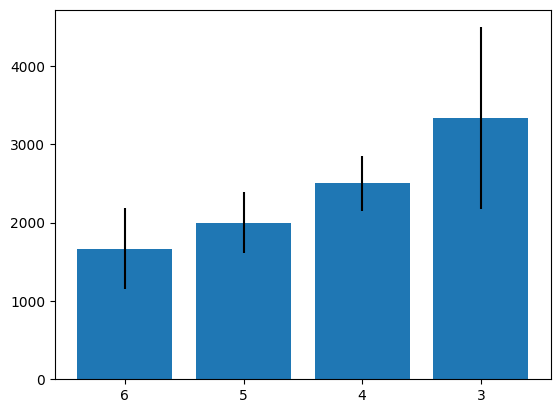

In [16]:
plt.bar(np.arange(4),height=[np.mean(list(d.values()))for d in l.values()],yerr=[np.std(list(d.values()))for d in l.values()])
plt.xticks(np.arange(4),list(l.keys()))
plt.xlabel("no of servers")
plt.ylabel("no. of requests")
plt.title("avg load per server")
plt.savefig("./results/AnalysisServerRemove.jpg")

In [ ]:
requests.get("http://10.171.9.221:5000/rep").json()["message"]

In [ ]:
requests.get("http://10.171.9.221:5000/rep").json()["message"]

In [ ]:
np.mean(list(l[6].values()))